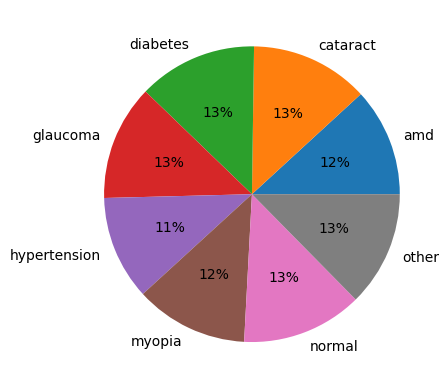

In [1]:
import matplotlib.pyplot as plt

classes = ['amd', 'cataract','diabetes', 'glaucoma', 'hypertension', 'myopia', 'normal','other' ]
classes_count= [ 7152, 7826, 7868, 7634, 6884, 7474, 7996, 7630]
plt.pie(classes_count , labels=classes , autopct='%0.f%%')
plt.show()

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [3]:
import splitfolders
basic_data = '/kaggle/input/original-data-set-project'
splitfolders.ratio(basic_data , output = "output_dataset" , seed=1337 , ratio=(0.8,0.1,0.1) , group_prefix=None)

Copying files: 60464 files [07:29, 134.52 files/s]


In [4]:
train_path = '/kaggle/working/output_dataset/train'
validation_path ='/kaggle/working/output_dataset/val'
test_path = '/kaggle/working/output_dataset/test'

In [5]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 [==============================] - 1s 0us/step


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory('/kaggle/working/output_dataset/train',
                                                    target_size=(299,299),
                                                    batch_size=32, 
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory('/kaggle/working/output_dataset/val',
                                                              target_size=(299 , 299),
                                                              batch_size=32, 
                                                              class_mode='categorical')

Found 48368 images belonging to 8 classes.
Found 6043 images belonging to 8 classes.


In [9]:
opt= tf.keras.optimizers.experimental.SGD(learning_rate=0.01, momentum=0.9, nesterov = True)

In [10]:
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, 
          steps_per_epoch = len(train_generator),
          epochs = 20,          
          validation_data=validation_generator, 
          validation_steps = len(validation_generator))

Epoch 1/20
1512/1512 [==============================] - 1794s 1s/step - loss: 0.8761 - accuracy: 0.6687 - val_loss: 0.7121 - val_accuracy: 0.7246
Epoch 2/20
1512/1512 [==============================] - 1742s 1s/step - loss: 0.4699 - accuracy: 0.8187 - val_loss: 0.4255 - val_accuracy: 0.8345
Epoch 3/20
1512/1512 [==============================] - 1747s 1s/step - loss: 0.3199 - accuracy: 0.8743 - val_loss: 0.3118 - val_accuracy: 0.8744
Epoch 4/20
1512/1512 [==============================] - 1743s 1s/step - loss: 0.2290 - accuracy: 0.9114 - val_loss: 0.2689 - val_accuracy: 0.8938
Epoch 5/20
1512/1512 [==============================] - 1707s 1s/step - loss: 0.1806 - accuracy: 0.9303 - val_loss: 0.2959 - val_accuracy: 0.8926
Epoch 6/20
1512/1512 [==============================] - 1690s 1s/step - loss: 0.1350 - accuracy: 0.9475 - val_loss: 0.3570 - val_accuracy: 0.8761
Epoch 7/20
1512/1512 [==============================] - 1699s 1s/step - loss: 0.1133 - accuracy: 0.9587 - val_loss: 0.2163 -

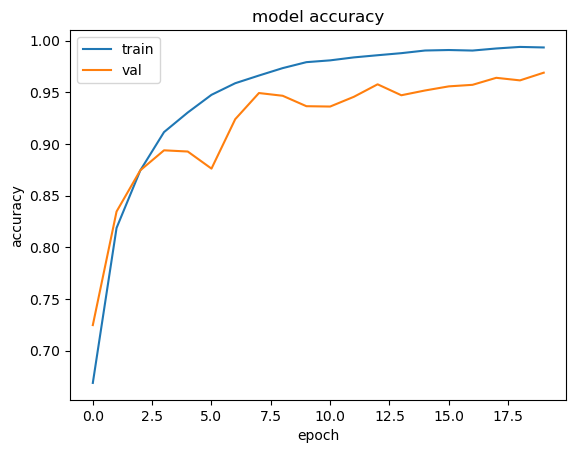

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

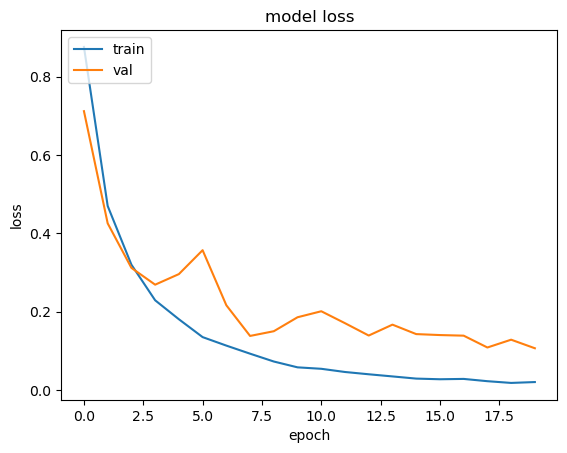

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/kaggle/working/output_dataset/test',
                                            target_size = (299,299),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 6053 images belonging to 8 classes.


In [15]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('test accuracy:',test_acc )
print('test loss:',test_loss)

190/190 [==============================] - 74s 384ms/step - loss: 0.0953 - accuracy: 0.9717
test accuracy: 0.9717495441436768
test loss: 0.09527677297592163


In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

In [17]:
y_pred = model.predict(test_generator, workers = 0)
y_pred_classes = np.argmax(y_pred , axis=1)
y_true = test_generator.classes[test_generator.index_array]
class_names = list(test_generator.class_indices.keys())

190/190 [==============================] - 69s 356ms/step


In [18]:
cr = classification_report(y_true , y_pred_classes , target_names=class_names )
print (classification_report(y_true , y_pred_classes , target_names=class_names))

              precision    recall  f1-score   support

         amd       0.99      1.00      1.00       716
    cataract       0.99      1.00      1.00       784
    diabetes       0.92      0.92      0.92       788
    glaucoma       1.00      0.99      0.99       764
hypertension       1.00      1.00      1.00       689
      myopia       1.00      1.00      1.00       748
      normal       0.92      0.90      0.91       801
       other       0.96      0.98      0.97       763

    accuracy                           0.97      6053
   macro avg       0.97      0.97      0.97      6053
weighted avg       0.97      0.97      0.97      6053



In [19]:
cm = confusion_matrix(y_true ,y_pred_classes)
print(cm)

[[716   0   0   0   0   0   0   0]
 [  0 784   0   0   0   0   0   0]
 [  0   1 723   0   1   0  46  17]
 [  1   0   0 757   0   0   6   0]
 [  0   0   0   0 687   0   2   0]
 [  0   0   0   0   0 748   0   0]
 [  4   2  57   3   2   0 719  14]
 [  1   1   6   0   0   0   7 748]]


Text(0.5, 1.0, 'Confusion Matrix')

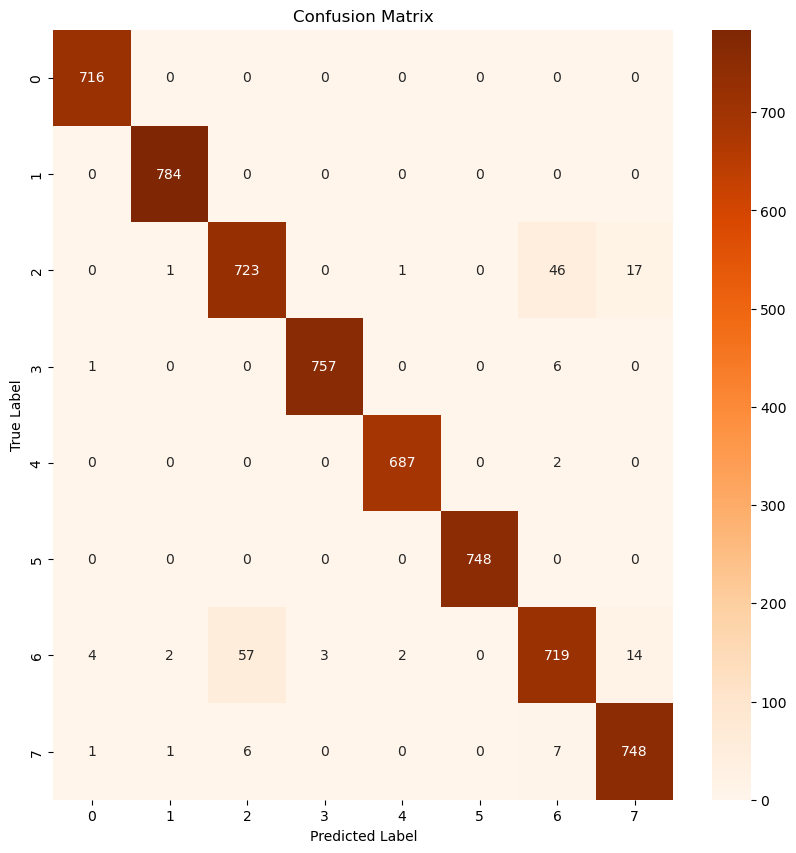

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=ax)

# Add axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [21]:
model.save('XCEPTION_original_data.h5')